In [430]:
#Importing the Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [400]:
#Loading the data
df = pd.read_csv("D:/CodSoft/IMDb Movies India.csv",encoding='latin1')

# EDA

In [401]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [402]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [404]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0


In [405]:
#Data Cleanning
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [406]:
df.dropna(inplace=True)


In [407]:
#Extracting only the text part from the Name column
df["Name"] = df["Name"].str.extract('([A-Za-z\s\'\-]+)')
df["Year"]=df["Year"].str.strip("()").astype(int)
df["Duration"]=df["Duration"].str.replace(" min","").astype(int)
df["Votes"]=df["Votes"].str.replace(",","").astype(int)

In [408]:
df = df.rename(columns={'Duration': 'Duration (min)'})
df.head()

,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [409]:
df.isnull().sum()

Name              7
Year              0
Duration (min)    0
Genre             0
Rating            0
Votes             0
Director          0
Actor 1           0
Actor 2           0
Actor 3           0
dtype: int64

In [410]:
df.drop_duplicates(inplace=True)

In [411]:
df.head()

,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Answering the Analysis Questions

In [412]:
avg_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()

# Find the year with the highest average rating
best_year = avg_rating_per_year.loc[avg_rating_per_year['Rating'].idxmax()]

print(f"Year with the best average rating: {int(best_year['Year'])} with rating {best_year['Rating']:.2f}")

Year with the best average rating: 1952 with rating 7.21


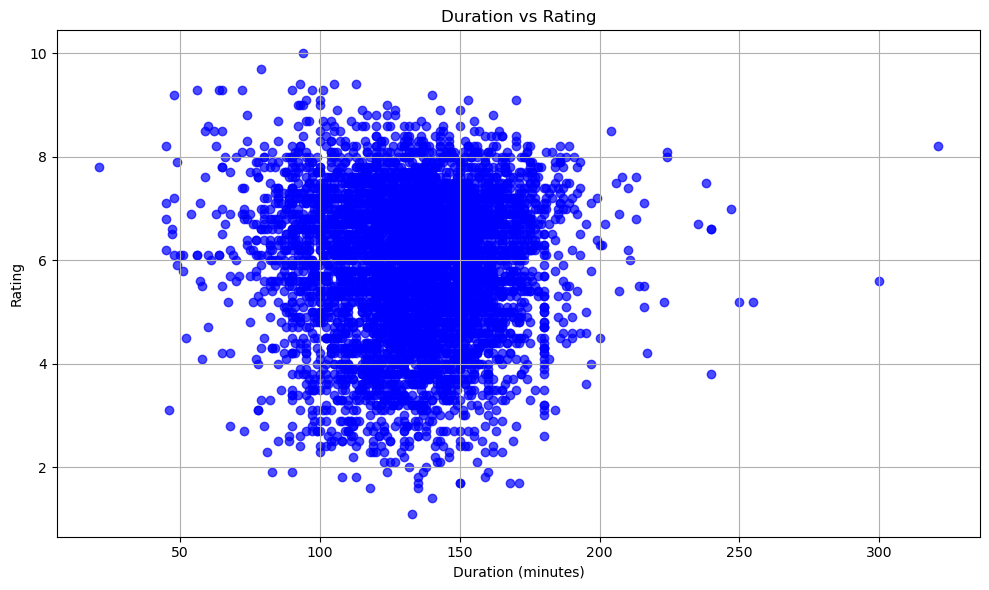

In [413]:
# Scatter plot of Duration vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (min)'], df['Rating'], color='blue', alpha=0.7)
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


we can conculde that there is no impact of the duration on the rating 

In [414]:
# Calculate top 10 movies per year
top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)

print("Top 10 Movies per Year:")
top_movies_per_year



Top 10 Movies per Year:


,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1,Draupadi,1931,124,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline,Jillo
2,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
3,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
4,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
...,...,...,...,...,...,...,...,...,...,...
812,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
813,Kaadan,2021,170,"Action, Drama, Fantasy",9.1,2219,Prabu Solomon,Raghu Babu,Rana Daggubati,Abudhar Al Hassan
814,Consequence Karma,2021,92,"Drama, Thriller",9.0,223,Shadab Ahmad,Sidharth Bhardwaj,Monis Khan,Pooja Gupta
815,Moral Nights,2021,93,Drama,9.0,37,S. Sunil,Kannanunni,Santhosh Keezhattoor,Sandra Larwin


In [415]:
# Calculate overall top 10 movies
overall_top_10 = df.nlargest(10, 'Rating')
print("\nOverall Top 10 Movies:")
overall_top_10


Overall Top 10 Movies:


,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
11843,Refl,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [416]:
top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)
number_of_popular_movies_per_year = top_movies_per_year.groupby('Year').size()

print("Number of popular movies released each year based on top 10 rating:")
number_of_popular_movies_per_year

Number of popular movies released each year based on top 10 rating:


Year
1931     2
1932     1
1933     1
1934     2
1935     5
        ..
2017    10
2018    10
2019    10
2020    10
2021    10
Length: 91, dtype: int64

In [417]:
#Sorting the data by Rating
df_sorted = df.sort_values(by='Rating', ascending=False)

#Grouping by Year and aggregate votes for top-rated movies
top_movies_per_year = df_sorted.groupby('Year').apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)
votes_per_year = top_movies_per_year.groupby('Year')['Votes'].sum()

print("Votes for top-rated movies per year:")
votes_per_year


Votes for top-rated movies per year:


Year
1931    112
1932     12
1933     12
1934      6
1935     38
       ... 
2017     62
2018      7
2019     47
2020      5
2021      7
Name: Votes, Length: 91, dtype: int32

In [418]:
# Aggregate votes overall for top-rated movies
overall_votes = top_movies_per_year['Votes'].sum()
print("Overall votes for top-rated movies:")
overall_votes

Overall votes for top-rated movies:


921937

In [419]:
director_counts = df['Director'].value_counts()

# Find the director with the maximum count
most_movies_director = director_counts.idxmax()  
num_movies_directed = director_counts.max()    

print(f"The director who directed the most movies is '{most_movies_director}' with {num_movies_directed} movies.")

The director who directed the most movies is 'David Dhawan' with 41 movies.


In [420]:
# Combine all actor columns into a single Series
actor_columns = ['Actor 1', 'Actor 2', 'Actor 3']
all_actors = pd.concat([df[col] for col in actor_columns]).dropna()

# Count occurrences of each actor
actor_counts = all_actors.value_counts()

# Find the actor with the maximum count
most_movies_actor = actor_counts.idxmax()  
num_movies_starred = actor_counts.max()    
print(f"The actor who starred in the most movies is '{most_movies_actor}' with {num_movies_starred} movies.")

The actor who starred in the most movies is 'Mithun Chakraborty' with 160 movies.


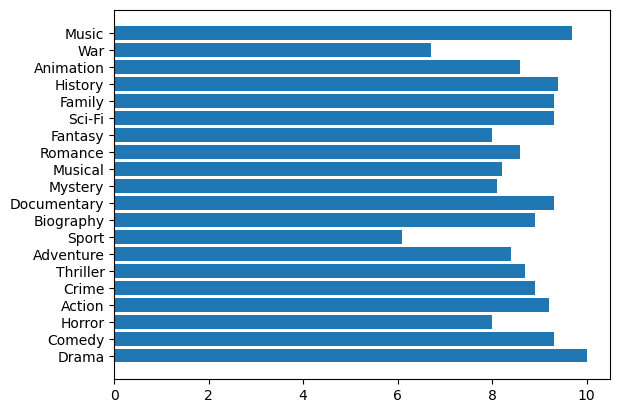

In [421]:
df['Genre']=df['Genre'].str.split(',',expand=True)[0]

plt.barh(df['Genre'],df['Rating']);

# Data Preprocessing

In [422]:
def encode_mean_ratings(df, categorical_cols, rating_col='Rating'):
    for col in categorical_cols:
        mean_rating = df.groupby(col)[rating_col].transform('mean')
        new_col_name = f'{col}_avg_rate'
        df[new_col_name] = mean_rating
    return df

# Define your categorical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']



In [423]:
# Apply the function to the DataFrame
df = encode_mean_ratings(df, categorical_cols)
df.head()

,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_avg_rate,Director_avg_rate,Actor 1_avg_rate,Actor 2_avg_rate,Actor 3_avg_rate
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.248697,7.000000,6.850000,7.000000,7.000000
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838423,4.400000,5.420000,4.400000,4.450000
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.838423,5.313333,4.788889,5.786667,5.872727
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.248697,7.383333,5.435000,6.933333,6.500000
8,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,4.687500,5.600000,5.600000,5.883333,5.600000


In [424]:
X = df.drop(columns=['Rating',"Name",'Actor 1', 'Actor 2', 'Actor 3','Director','Genre'])
y = df['Rating']

In [425]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [426]:
regressor = RandomForestRegressor()

In [427]:
regressor.fit(X_train,y_train)


RandomForestRegressor()

In [428]:
regressor_pred = regressor.predict(X_test)

# Evaluation

In [358]:
mse = mean_squared_error(y_test, regressor_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2202313189045937


In [ ]:
mae = mean_absolute_error(y_test, regressor_pred)
print(f"Mean Absolute Error: {mae}")

In [359]:
r2 = r2_score(y_test, regressor_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.3410365838413947
